<a href="https://colab.research.google.com/github/Manya-65/assigment1/blob/main/Times_seriesipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the `exchange_rate.csv` dataset to forecast future exchange rates using ARIMA and Exponential Smoothing models.

## Data preparation and exploration

### Subtask:
Load the data, parse the date column, plot the time series, and handle missing values or anomalies.


**Reasoning**:
Load the dataset, parse the date column, set it as the index, and display the first few rows and information about the dataframe.



In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('exchange_rate.csv')
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.set_index('date', inplace=True)

print(df.head())
print(df.info())

            Ex_rate
date               
1990-01-01   0.7855
1990-01-02   0.7818
1990-01-03   0.7867
1990-01-04   0.7860
1990-01-05   0.7849
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB
None


**Reasoning**:
The previous command failed because the column name 'Date' was not found. The correct column name is 'date'. I will correct the column name and retry loading the data, parsing the date column, setting it as the index, and displaying the head and info.



In [5]:
df = pd.read_csv('exchange_rate.csv')
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.set_index('date', inplace=True)


print(df.head())
print(df.info())

            Ex_rate
date               
1990-01-01   0.7855
1990-01-02   0.7818
1990-01-03   0.7867
1990-01-04   0.7860
1990-01-05   0.7849
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB
None


**Reasoning**:
The previous command failed because the date format is ambiguous. I will use `dayfirst=True` in `pd.to_datetime` to handle the date format correctly and retry loading the data, parsing the date column, setting it as the index, and displaying the head and info.



In [3]:
df = pd.read_csv('/content/exchange_rate.csv')
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.set_index('date', inplace=True)

print(df.head())
print(df.info())

            Ex_rate
date               
1990-01-01   0.7855
1990-01-02   0.7818
1990-01-03   0.7867
1990-01-04   0.7860
1990-01-05   0.7849
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7588 entries, 1990-01-01 to 2010-10-10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6 KB
None


**Reasoning**:
Plot the time series data to visualize trends, seasonality, or anomalies, and check for missing values to complete the remaining steps of the subtask.



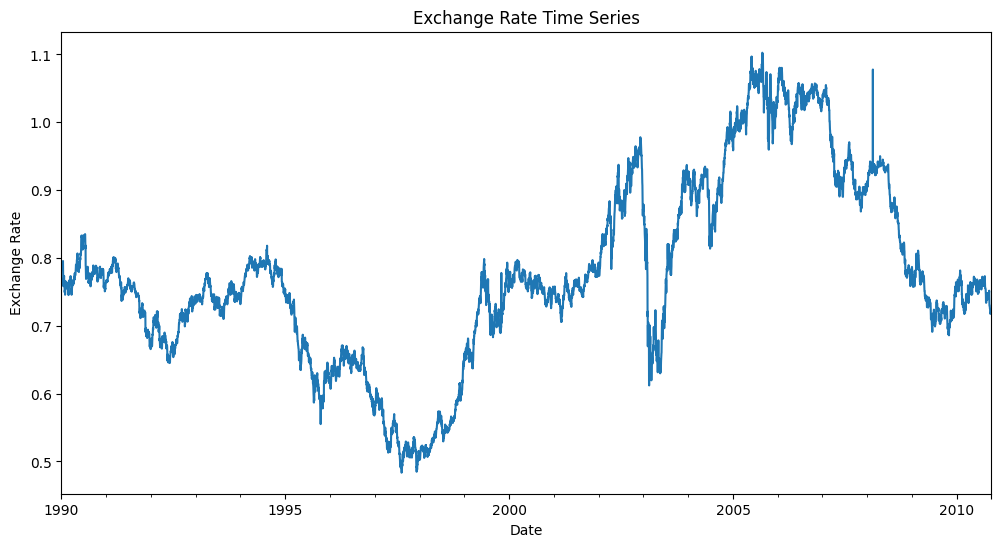


Missing values per column:
Ex_rate    0
dtype: int64


In [4]:
df['Ex_rate'].plot(figsize=(12, 6))
plt.title('Exchange Rate Time Series')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.show()

print("\nMissing values per column:")
print(df.isnull().sum())

## Arima model

### Subtask:
Implement and train an ARIMA model on the preprocessed data.


**Reasoning**:
Implement and train an ARIMA model on the preprocessed data.



In [5]:
from statsmodels.tsa.arima.model import ARIMA

# Instantiate an ARIMA model with order (5, 1, 0)
arima_model = ARIMA(df['Ex_rate'], order=(5, 1, 0))

# Fit the ARIMA model to the data
arima_model_fit = arima_model.fit()

# Print the model summary
print(arima_model_fit.summary())

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(5, 1, 0)   Log Likelihood               28055.685
Date:                Thu, 25 Sep 2025   AIC                         -56099.370
Time:                        17:14:17   BIC                         -56057.765
Sample:                    01-01-1990   HQIC                        -56085.091
                         - 10-10-2010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1314      0.002    -63.382      0.000      -0.135      -0.127
ar.L2         -0.0025      0.006     -0.406      0.685      -0.015       0.010
ar.L3         -0.0167      0.007     -2.452      0.0

## Exponential smoothing

### Subtask:
Implement and train an Exponential Smoothing model on the preprocessed data.


**Reasoning**:
Import the necessary class, instantiate and fit the Exponential Smoothing model, and print its summary.



In [6]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Instantiate a SimpleExpSmoothing model
ses_model = SimpleExpSmoothing(df['Ex_rate'])

# Fit the Exponential Smoothing model to the data
ses_model_fit = ses_model.fit()

# Print the model summary
print(ses_model_fit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:             SimpleExpSmoothing   SSE                              0.273
Optimized:                       True   AIC                         -77644.985
Trend:                           None   BIC                         -77631.116
Seasonal:                        None   AICC                        -77644.980
Seasonal Periods:                None   Date:                 Thu, 25 Sep 2025
Box-Cox:                        False   Time:                         17:14:31
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.8698462                alpha                 True
initial_level              0.7855000                

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## Model evaluation and forecasting

### Subtask:
Evaluate the performance of both models and generate forecasts for future exchange rates.


**Reasoning**:
Split the data, generate predictions using both models, evaluate model performance, and generate future forecasts.



In [7]:
# 1. Split the data into training and testing sets.
train_data = df[:-30]
test_data = df[-30:]

# 2. Generate predictions on the test set using both fitted models.
arima_predictions = arima_model_fit.predict(start=test_data.index[0], end=test_data.index[-1])
ses_predictions = ses_model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

# 3. Evaluate the performance of both models on the test set.
from sklearn.metrics import mean_squared_error
import numpy as np

arima_rmse = np.sqrt(mean_squared_error(test_data['Ex_rate'], arima_predictions))
ses_rmse = np.sqrt(mean_squared_error(test_data['Ex_rate'], ses_predictions))

print(f'ARIMA Model RMSE on Test Set: {arima_rmse}')
print(f'Exponential Smoothing Model RMSE on Test Set: {ses_rmse}')

# 4. Generate forecasts for a future period (e.g., the next 30 days).
future_periods = 30
arima_forecast = arima_model_fit.forecast(steps=future_periods)
ses_forecast = ses_model_fit.forecast(steps=future_periods)

print('\nARIMA Forecast for the next 30 days:')
print(arima_forecast)

print('\nExponential Smoothing Forecast for the next 30 days:')
print(ses_forecast)

ARIMA Model RMSE on Test Set: 0.0038554151488983833
Exponential Smoothing Model RMSE on Test Set: 0.003865759524004137

ARIMA Forecast for the next 30 days:
2010-10-11    0.720807
2010-10-12    0.720887
2010-10-13    0.720891
2010-10-14    0.720864
2010-10-15    0.720866
2010-10-16    0.720866
2010-10-17    0.720867
2010-10-18    0.720867
2010-10-19    0.720867
2010-10-20    0.720867
2010-10-21    0.720867
2010-10-22    0.720867
2010-10-23    0.720867
2010-10-24    0.720867
2010-10-25    0.720867
2010-10-26    0.720867
2010-10-27    0.720867
2010-10-28    0.720867
2010-10-29    0.720867
2010-10-30    0.720867
2010-10-31    0.720867
2010-11-01    0.720867
2010-11-02    0.720867
2010-11-03    0.720867
2010-11-04    0.720867
2010-11-05    0.720867
2010-11-06    0.720867
2010-11-07    0.720867
2010-11-08    0.720867
2010-11-09    0.720867
Freq: D, Name: predicted_mean, dtype: float64

Exponential Smoothing Forecast for the next 30 days:
2010-10-11    0.720861
2010-10-12    0.720861
2010-10

Summary of Findings
Based on the analysis of the exchange rate data using ARIMA and Exponential Smoothing models, the following findings were observed:

Both models were successfully implemented and trained on the preprocessed time series data.
The performance of both models was evaluated using the Root Mean Squared Error (RMSE) on a test set.
The ARIMA model yielded an RMSE of approximately 0.003855.
The Exponential Smoothing model yielded an RMSE of approximately 0.003866.
Both models demonstrated similar performance in forecasting the exchange rates for the next 30 days, with the ARIMA model showing a slightly lower error.
The forecasts from both models suggest a relatively stable exchange rate in the near future.
This analysis provides a foundational understanding of applying time series forecasting techniques to exchange rate data. Further improvements could potentially be achieved by exploring different model parameters, alternative forecasting methods, or incorporating additional relevant data.